### Import Necesseary Libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load Data

In [2]:
df = pd.read_csv('./laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [4]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [5]:
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [6]:
df['GPU'].fillna('Integrated', inplace=True)

In [7]:
df.isnull().sum()

Laptop           0
Status           0
Brand            0
Model            0
CPU              0
RAM              0
Storage          0
Storage type    42
GPU              0
Screen           4
Touch            0
Final Price      0
dtype: int64

In [8]:
df['Storage type'].unique()

array(['SSD', 'eMMC', nan], dtype=object)

In [9]:
df.loc[df['Storage type'].isna()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
145,ASUS Chromebook CX1400CNA-BV0210 Intel Celeron...,New,Asus,Chromebook,Intel Celeron,8,32,NaN,Integrated,14.0,No,349.00
189,Portátil Alurin Flex Advance Intel Core I5-115...,Refurbished,Alurin,Flex Advance,Intel Core i5,8,0,NaN,Integrated,14.0,No,368.70
260,ASUS ROG Strix G16 G614JZ-N3008 Intel Core i7-...,New,Asus,ROG,Intel Core i7,32,1000,NaN,RTX 4080,16.0,No,2599.01
477,Prixton Flex Pro Intel Celeron N4020/4GB/64GB/...,New,Prixton,Flex,Intel Celeron,4,64,NaN,Integrated,11.6,Yes,329.95
493,"Apple MacBook Pro Intel Core i5/8GB/256GB/13"" ...",Refurbished,Apple,MacBook Pro,Intel Core i5,8,256,NaN,Integrated,13.0,No,634.25
569,"Alurin AMD R5 5500U 15.6"" 8 256 con SO",New,Alurin,Alurin,AMD Radeon 5,8,256,NaN,Integrated,15.6,No,499.00
581,"Alurin Intel Core I7 12th 15.6"" 16 500 con SO",New,Alurin,Alurin,Intel Core i7,8,500,NaN,Integrated,15.6,No,869.00
600,ASUS F515EA-BQ1625W Intel Core i3-1115G4/8GB/2...,New,Asus,F515,Intel Core i3,8,256,NaN,Integrated,15.6,No,408.00
654,HP Chromebook x360 11 G3 Education Edition Int...,New,HP,Chromebook,Intel Celeron,4,32,NaN,Integrated,11.6,Yes,282.57
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NaN,Integrated,11.6,No,230.14


In [10]:
df.drop(df.loc[df['Storage type'].isna()].index, axis=0, inplace=True)

In [11]:
df['Screen'].unique()

array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
       14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
       10.5 , 13.  , 14.4 ,   nan, 12.3 , 11.6 , 15.4 , 12.5 , 10.1 ,
       10.95, 13.9 ])

In [12]:
df.loc[df['Screen'].isna()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
624,Acer Extensa 15 EX215-54 Intel Core i5-1135G7/...,New,Acer,Extensa,Intel Core i5,8,256,SSD,Integrated,NaN,No,524.99
1430,HP ENVY x360 2-in-1 Laptop 15-ew0008np Intel C...,New,HP,Envy,Intel Core i7,16,512,SSD,RTX 2050,NaN,Yes,1863.52
1503,Lenovo IdeaPad Gaming 3 15ACH6 AMD Ryzen 5 560...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,RTX 3060,NaN,No,1505.00
1548,Lenovo ThinkPad P15 Gen 2 Intel Core i7-11850H...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A2000,NaN,No,2569.00


In [13]:
df.drop(df.loc[df['Screen'].isna()].index, axis=0, inplace=True)

In [14]:
df.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

In [15]:
df.drop(['Laptop'], axis=1, inplace=True)
df.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,Integrated,15.6,No,1009.00
1,New,Alurin,Go,Intel Celeron,8,256,SSD,Integrated,15.6,No,299.00
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,Integrated,15.6,No,789.00
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,New,HP,15S,Intel Core i5,16,512,SSD,Integrated,15.6,No,669.01


In [16]:
df['Brand Model']=df['Brand']+' '+df['Model']
df.drop(['Brand', 'Model'], axis=1, inplace=True)
df.head()

,Status,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model
0,New,Intel Core i5,8,512,SSD,Integrated,15.6,No,1009.00,Asus ExpertBook
1,New,Intel Celeron,8,256,SSD,Integrated,15.6,No,299.00,Alurin Go
2,New,Intel Core i3,8,256,SSD,Integrated,15.6,No,789.00,Asus ExpertBook
3,New,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00,MSI Katana
4,New,Intel Core i5,16,512,SSD,Integrated,15.6,No,669.01,HP 15S


In [17]:
encode_status = {
	'New' : 1,
	'Refurbished' : 0
}

In [18]:
df['Status'] = df['Status'].apply(lambda x: encode_status[x])
df

,Status,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model
0,1,Intel Core i5,8,512,SSD,Integrated,15.6,No,1009.00,Asus ExpertBook
1,1,Intel Celeron,8,256,SSD,Integrated,15.6,No,299.00,Alurin Go
2,1,Intel Core i3,8,256,SSD,Integrated,15.6,No,789.00,Asus ExpertBook
3,1,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00,MSI Katana
4,1,Intel Core i5,16,512,SSD,Integrated,15.6,No,669.01,HP 15S
...,...,...,...,...,...,...,...,...,...,...
2155,0,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99,Razer Blade
2156,0,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99,Razer Blade
2157,0,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99,Razer Blade
2158,0,Intel Evo Core i7,16,1000,SSD,Integrated,13.4,Yes,1899.99,Razer Book


In [19]:
df['Touch'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
encode_status = {
	'Yes' : 1,
	'No' : 0
}

In [21]:
df['Touch'] = df['Touch'].apply(lambda x: encode_status[x])
df

,Status,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model
0,1,Intel Core i5,8,512,SSD,Integrated,15.6,0,1009.00,Asus ExpertBook
1,1,Intel Celeron,8,256,SSD,Integrated,15.6,0,299.00,Alurin Go
2,1,Intel Core i3,8,256,SSD,Integrated,15.6,0,789.00,Asus ExpertBook
3,1,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,MSI Katana
4,1,Intel Core i5,16,512,SSD,Integrated,15.6,0,669.01,HP 15S
...,...,...,...,...,...,...,...,...,...,...
2155,0,Intel Core i7,16,1000,SSD,RTX 3060,17.3,0,2699.99,Razer Blade
2156,0,Intel Core i7,16,1000,SSD,RTX 3070,17.3,0,2899.99,Razer Blade
2157,0,Intel Core i7,32,1000,SSD,RTX 3080,17.3,0,3399.99,Razer Blade
2158,0,Intel Evo Core i7,16,1000,SSD,Integrated,13.4,1,1899.99,Razer Book


In [22]:
df['Storage type'].unique()

array(['SSD', 'eMMC'], dtype=object)

In [23]:
encode_status = {
	'eMMC' : 0,
	'SSD' : 1,
}

In [24]:
df['Storage type'] = df['Storage type'].apply(lambda x: encode_status[x])
df

,Status,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model
0,1,Intel Core i5,8,512,1,Integrated,15.6,0,1009.00,Asus ExpertBook
1,1,Intel Celeron,8,256,1,Integrated,15.6,0,299.00,Alurin Go
2,1,Intel Core i3,8,256,1,Integrated,15.6,0,789.00,Asus ExpertBook
3,1,Intel Core i7,16,1000,1,RTX 3050,15.6,0,1199.00,MSI Katana
4,1,Intel Core i5,16,512,1,Integrated,15.6,0,669.01,HP 15S
...,...,...,...,...,...,...,...,...,...,...
2155,0,Intel Core i7,16,1000,1,RTX 3060,17.3,0,2699.99,Razer Blade
2156,0,Intel Core i7,16,1000,1,RTX 3070,17.3,0,2899.99,Razer Blade
2157,0,Intel Core i7,32,1000,1,RTX 3080,17.3,0,3399.99,Razer Blade
2158,0,Intel Evo Core i7,16,1000,1,Integrated,13.4,1,1899.99,Razer Book


In [25]:
df.reset_index(inplace=True, drop=True)
df

,Status,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model
0,1,Intel Core i5,8,512,1,Integrated,15.6,0,1009.00,Asus ExpertBook
1,1,Intel Celeron,8,256,1,Integrated,15.6,0,299.00,Alurin Go
2,1,Intel Core i3,8,256,1,Integrated,15.6,0,789.00,Asus ExpertBook
3,1,Intel Core i7,16,1000,1,RTX 3050,15.6,0,1199.00,MSI Katana
4,1,Intel Core i5,16,512,1,Integrated,15.6,0,669.01,HP 15S
...,...,...,...,...,...,...,...,...,...,...
2109,0,Intel Core i7,16,1000,1,RTX 3060,17.3,0,2699.99,Razer Blade
2110,0,Intel Core i7,16,1000,1,RTX 3070,17.3,0,2899.99,Razer Blade
2111,0,Intel Core i7,32,1000,1,RTX 3080,17.3,0,3399.99,Razer Blade
2112,0,Intel Evo Core i7,16,1000,1,Integrated,13.4,1,1899.99,Razer Book


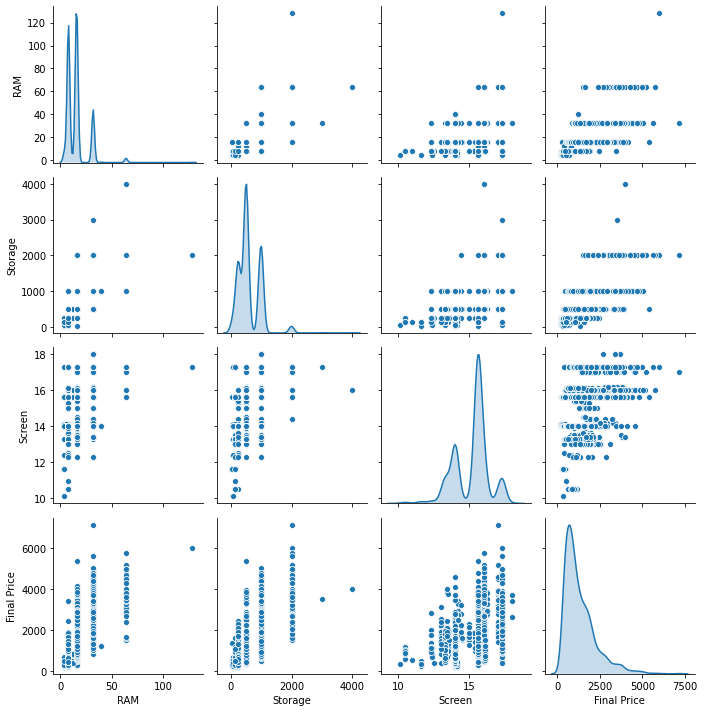

In [51]:
# Select the columns for the pair plot
columns_for_pair_plot = ['RAM', 'Storage', 'Screen', 'Final Price']

# Create the pair plot
sns.pairplot(df[columns_for_pair_plot], diag_kind='kde', markers='o', palette='coolwarm')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

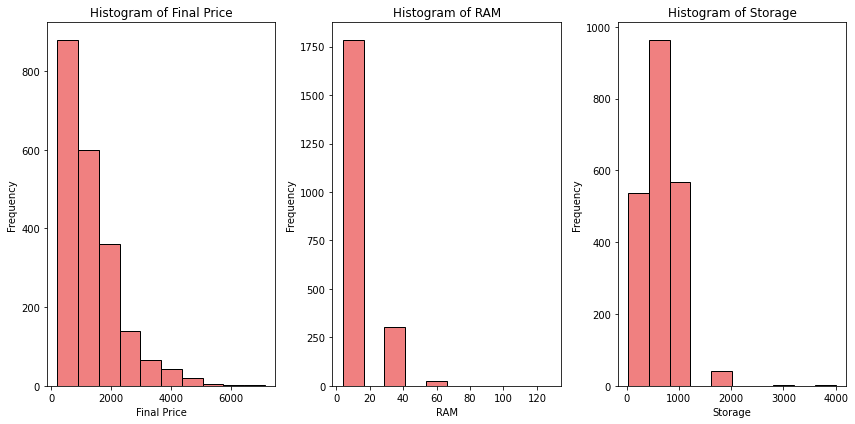

In [35]:
columns = ['Final Price', 'RAM', 'Storage']

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    plt.hist(df[column], bins=10, color='lightcoral', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

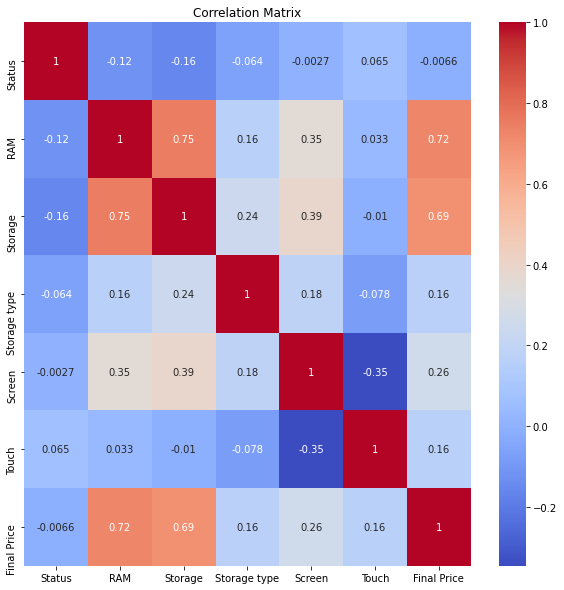

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
ohe = OneHotEncoder(sparse=False)

In [28]:
cat_columns = ['CPU', 'GPU', 'Brand Model']

In [29]:
encoded=ohe.fit_transform(df[cat_columns])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cat_columns))
encoded_df

,CPU_AMD 3015Ce,CPU_AMD 3015e,CPU_AMD 3020e,CPU_AMD Athlon,CPU_AMD Radeon 9,CPU_AMD Ryzen 3,CPU_AMD Ryzen 5,CPU_AMD Ryzen 7,CPU_AMD Ryzen 9,CPU_Apple M1,...,Brand Model_Prixton Netbook Pro,Brand Model_Razer Blade,Brand Model_Razer Book,Brand Model_Realme Book Prime,Brand Model_Samsung Chromebook,Brand Model_Samsung Galaxy Book,Brand Model_Thomson Neo,Brand Model_Toshiba Tecra,Brand Model_Vant Edge,Brand Model_Vant Moove
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df = pd.concat([df, encoded_df], axis=1)
df

,Status,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,Brand Model,...,Brand Model_Prixton Netbook Pro,Brand Model_Razer Blade,Brand Model_Razer Book,Brand Model_Realme Book Prime,Brand Model_Samsung Chromebook,Brand Model_Samsung Galaxy Book,Brand Model_Thomson Neo,Brand Model_Toshiba Tecra,Brand Model_Vant Edge,Brand Model_Vant Moove
0,1,Intel Core i5,8,512,1,Integrated,15.6,0,1009.00,Asus ExpertBook,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Intel Celeron,8,256,1,Integrated,15.6,0,299.00,Alurin Go,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Intel Core i3,8,256,1,Integrated,15.6,0,789.00,Asus ExpertBook,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Intel Core i7,16,1000,1,RTX 3050,15.6,0,1199.00,MSI Katana,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Intel Core i5,16,512,1,Integrated,15.6,0,669.01,HP 15S,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0,Intel Core i7,16,1000,1,RTX 3060,17.3,0,2699.99,Razer Blade,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0,Intel Core i7,16,1000,1,RTX 3070,17.3,0,2899.99,Razer Blade,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0,Intel Core i7,32,1000,1,RTX 3080,17.3,0,3399.99,Razer Blade,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0,Intel Evo Core i7,16,1000,1,Integrated,13.4,1,1899.99,Razer Book,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.drop(cat_columns, axis=1, inplace=True)

In [32]:
df

,Status,RAM,Storage,Storage type,Screen,Touch,Final Price,CPU_AMD 3015Ce,CPU_AMD 3015e,CPU_AMD 3020e,...,Brand Model_Prixton Netbook Pro,Brand Model_Razer Blade,Brand Model_Razer Book,Brand Model_Realme Book Prime,Brand Model_Samsung Chromebook,Brand Model_Samsung Galaxy Book,Brand Model_Thomson Neo,Brand Model_Toshiba Tecra,Brand Model_Vant Edge,Brand Model_Vant Moove
0,1,8,512,1,15.6,0,1009.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8,256,1,15.6,0,299.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,256,1,15.6,0,789.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,16,1000,1,15.6,0,1199.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,16,512,1,15.6,0,669.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0,16,1000,1,17.3,0,2699.99,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0,16,1000,1,17.3,0,2899.99,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0,32,1000,1,17.3,0,3399.99,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0,16,1000,1,13.4,1,1899.99,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
list(set(df.isna().sum().values))

[0]

In [34]:
x = df.drop(['Final Price'], axis=1)
y = df['Final Price']

In [35]:
x

,Status,RAM,Storage,Storage type,Screen,Touch,CPU_AMD 3015Ce,CPU_AMD 3015e,CPU_AMD 3020e,CPU_AMD Athlon,...,Brand Model_Prixton Netbook Pro,Brand Model_Razer Blade,Brand Model_Razer Book,Brand Model_Realme Book Prime,Brand Model_Samsung Chromebook,Brand Model_Samsung Galaxy Book,Brand Model_Thomson Neo,Brand Model_Toshiba Tecra,Brand Model_Vant Edge,Brand Model_Vant Moove
0,1,8,512,1,15.6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8,256,1,15.6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,256,1,15.6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,16,1000,1,15.6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,16,512,1,15.6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0,16,1000,1,17.3,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0,16,1000,1,17.3,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0,32,1000,1,17.3,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,0,16,1000,1,13.4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y

0       1009.00
1        299.00
2        789.00
3       1199.00
4        669.01
         ...   
2109    2699.99
2110    2899.99
2111    3399.99
2112    1899.99
2113    1699.99
Name: Final Price, Length: 2114, dtype: float64